# A Python Dashboard in the time of Corona

> Welcome to COVID-19 India Matplotlib Overview where I track coronavirus total cases, deaths, new cases and recovered in India. The dashboard is automatically updated every 2 hours in order to be up to date with the information.  

- author: Sakthisree

In [1]:
#hide

## Import essential packages below

import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
from IPython.core.display import display,HTML
import warnings
from datetime import date
from datetime import timedelta
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
#hide
df = pd.read_csv("https://api.covid19india.org/csv/latest/states.csv")

In [3]:
#hide

#splitting df into confirmed data, deceased data and recovered data in all states date wise

confirmed = df.iloc[:,:3]
death = df.iloc[:,[0,1,4]]
recovered = df.iloc[:,[0,1,3]]

In [4]:
#hide
#changing 'Date' to date type and sorting dataframes from old to new

confirmed['Date'] = pd.to_datetime(confirmed.Date)
confirmed.sort_values(by=['Date']);

death['Date'] = pd.to_datetime(death.Date)
death.sort_values(by=['Date']);

recovered['Date'] = pd.to_datetime(recovered.Date)
recovered.sort_values(by=['Date']);

In [5]:
#hide
today = date.today()
if today.strftime("%Y-%m-%d") not in confirmed['Date']:
    today = today - timedelta(days = 1)
else:
    today = today

#fetching confirmed cases number from today
today_confirmed_data = confirmed[confirmed['Date'] == today.strftime("%Y-%m-%d")]
confirmed_cases = today_confirmed_data[today_confirmed_data['State'] == "India"]['Confirmed']
confirmed_cases = int(confirmed_cases.item())

#fetching deceased cases number from today
today_deceased_data = death[death['Date'] == today.strftime("%Y-%m-%d")]
deceased_cases = today_deceased_data[today_deceased_data['State'] == "India"]['Deceased']
deceased_cases = int(deceased_cases.item())

#fetching recovered cases from today
today_recovered_data = recovered[recovered['Date'] == today.strftime("%Y-%m-%d")]
recovered_cases = today_recovered_data[today_recovered_data['State'] == "India"]['Recovered']
recovered_cases = int(recovered_cases.item())



In [6]:
#hide
yesterday = today - timedelta(days = 1) 

#fetching confirmed cases number from yesterday
yesterday_confirmed_data = confirmed[confirmed['Date'] == yesterday.strftime("%Y-%m-%d")]
yesterday_confirmed_cases = yesterday_confirmed_data[yesterday_confirmed_data['State'] == "India"]['Confirmed']

#fetching deceased cases number from yesterday
yesterday_deceased_data = death[death['Date'] == yesterday.strftime("%Y-%m-%d")]
yesterday_deceased_cases = yesterday_deceased_data[yesterday_deceased_data['State'] == "India"]['Deceased']

#fetching recovered cases from yesterday
yesterday_recovered_data = recovered[recovered['Date'] == yesterday.strftime("%Y-%m-%d")]
yesterday_recovered_cases = yesterday_recovered_data[yesterday_recovered_data['State'] == "India"]['Recovered']

#getting increase in numbers from yesterday to today
new = confirmed_cases - yesterday_confirmed_cases
dnew = deceased_cases - yesterday_deceased_cases
drecov = recovered_cases - yesterday_recovered_cases


In [7]:
#hide

#creating the html overview of the data
overview = '''
<!-- #######  HTML!! #########-->
<h1 style="color: #5e9ca0; text-align: center;background-color:black;font-size:30px;">India</h1>

<p style="text-align: center;background-color:#e8e8e8;">Last update: <strong>{update}</strong></p>

<p style="text-align: center;font-size:18px">Confirmed cases:</p>
<p style="text-align: center;font-size:24px;"><strong>{cases}</strong> (<span style="color: #ff0000;">+{new}</span>)</p>

<p style="text-align: center;font-size:18px">Confirmed deaths:</p>
<p style="text-align: center;font-size:24px;"><strong>{deaths}</strong> (<span style="color: #ff0000;">+{dnew}</span>)</p>

<p style="text-align: center;font-size:18px">Recovered:</p>
<p style="text-align: center;font-size:24px;"><strong>{recovered}</strong> (<span style="color: #ff0000;">+{drecov}</span>)</p>

'''

In [8]:
#hide
html = HTML(overview.format(update=today, cases=confirmed_cases,new=new.item(),deaths=deceased_cases,dnew=dnew.item(),recovered = recovered_cases,drecov = drecov.item()))

In [9]:
#hide_input
display(html)

In [10]:
#hide
import datetime 

#manipulating the dataframes to get the correct dataframe columns to work with

dates_so_far = df.Date.unique().tolist()
column_names = ['State']+ dates_so_far 

revised_confirmed_df = pd.DataFrame(columns = column_names)
revised_confirmed_df['State'] = confirmed['State'].unique()
revised_confirmed_df = revised_confirmed_df.set_index('State')

revised_deceased_df = pd.DataFrame(columns = column_names)
revised_deceased_df['State'] = death['State'].unique()
revised_deceased_df = revised_deceased_df.set_index('State')

revised_recovered_df = pd.DataFrame(columns = column_names)
revised_recovered_df['State'] = recovered['State'].unique()
revised_recovered_df = revised_recovered_df.set_index('State')


In [11]:
#hide
for i in dates_so_far: 
    states_having_confirmed_cases = confirmed[confirmed['Date'] == i]
    states_having_deceased_cases = death[death['Date'] == i]
    states_having_recovered_cases = recovered[recovered['Date'] == i]
    for j in states_having_confirmed_cases['State']:
        revised_confirmed_df.loc[j][i] = states_having_confirmed_cases[states_having_confirmed_cases['State'] == j]['Confirmed'].item()
        revised_deceased_df.loc[j][i] = states_having_deceased_cases[states_having_deceased_cases['State'] == j]['Deceased'].item()
        revised_recovered_df.loc[j][i] = states_having_recovered_cases[states_having_recovered_cases['State'] == j]['Recovered'].item()

revised_confirmed_df = revised_confirmed_df.replace(np.nan,0)
revised_deceased_df = revised_deceased_df.replace(np.nan,0)
revised_recovered_df = revised_recovered_df.replace(np.nan,0)


In [12]:
#hide

#creating a total summary overview of the cases, deaths, recovered, delta of cases, delta of deaths, delta of recovered and fatality rates
today_summary_table = pd.DataFrame(columns = ['State','Confirmed','Deceased','Recovered','PConfirmed','PDeceased','PRecovered','Fatality Rate'])
today_summary_table['State'] = confirmed['State'].unique()
today_summary_table = today_summary_table.set_index('State')

today_summary_table['Confirmed'] = revised_confirmed_df[today.strftime("%Y-%m-%d")]
today_summary_table['Deceased'] = revised_deceased_df[today.strftime("%Y-%m-%d")]
today_summary_table['Recovered'] = revised_recovered_df[today.strftime("%Y-%m-%d")]

today_summary_table['PConfirmed'] = revised_confirmed_df[yesterday.strftime("%Y-%m-%d")]
today_summary_table['PDeceased'] = revised_deceased_df[yesterday.strftime("%Y-%m-%d")]
today_summary_table['PRecovered'] = revised_recovered_df[yesterday.strftime("%Y-%m-%d")]

today_summary_table['Fatality Rate'] = (100* today_summary_table['Deceased']/ today_summary_table['Confirmed']).round(2)

today_summary_table = today_summary_table.drop(['State Unassigned'], axis = 0)
today_summary_table = today_summary_table.sort_values(by = ['Confirmed', 'Deceased'], ascending = [False, False]).reset_index()
#today_summary_table.style.background_gradient(cmap='Blues')

In [13]:
#hide
revised_confirmed_df = revised_confirmed_df.drop("India", axis=0)

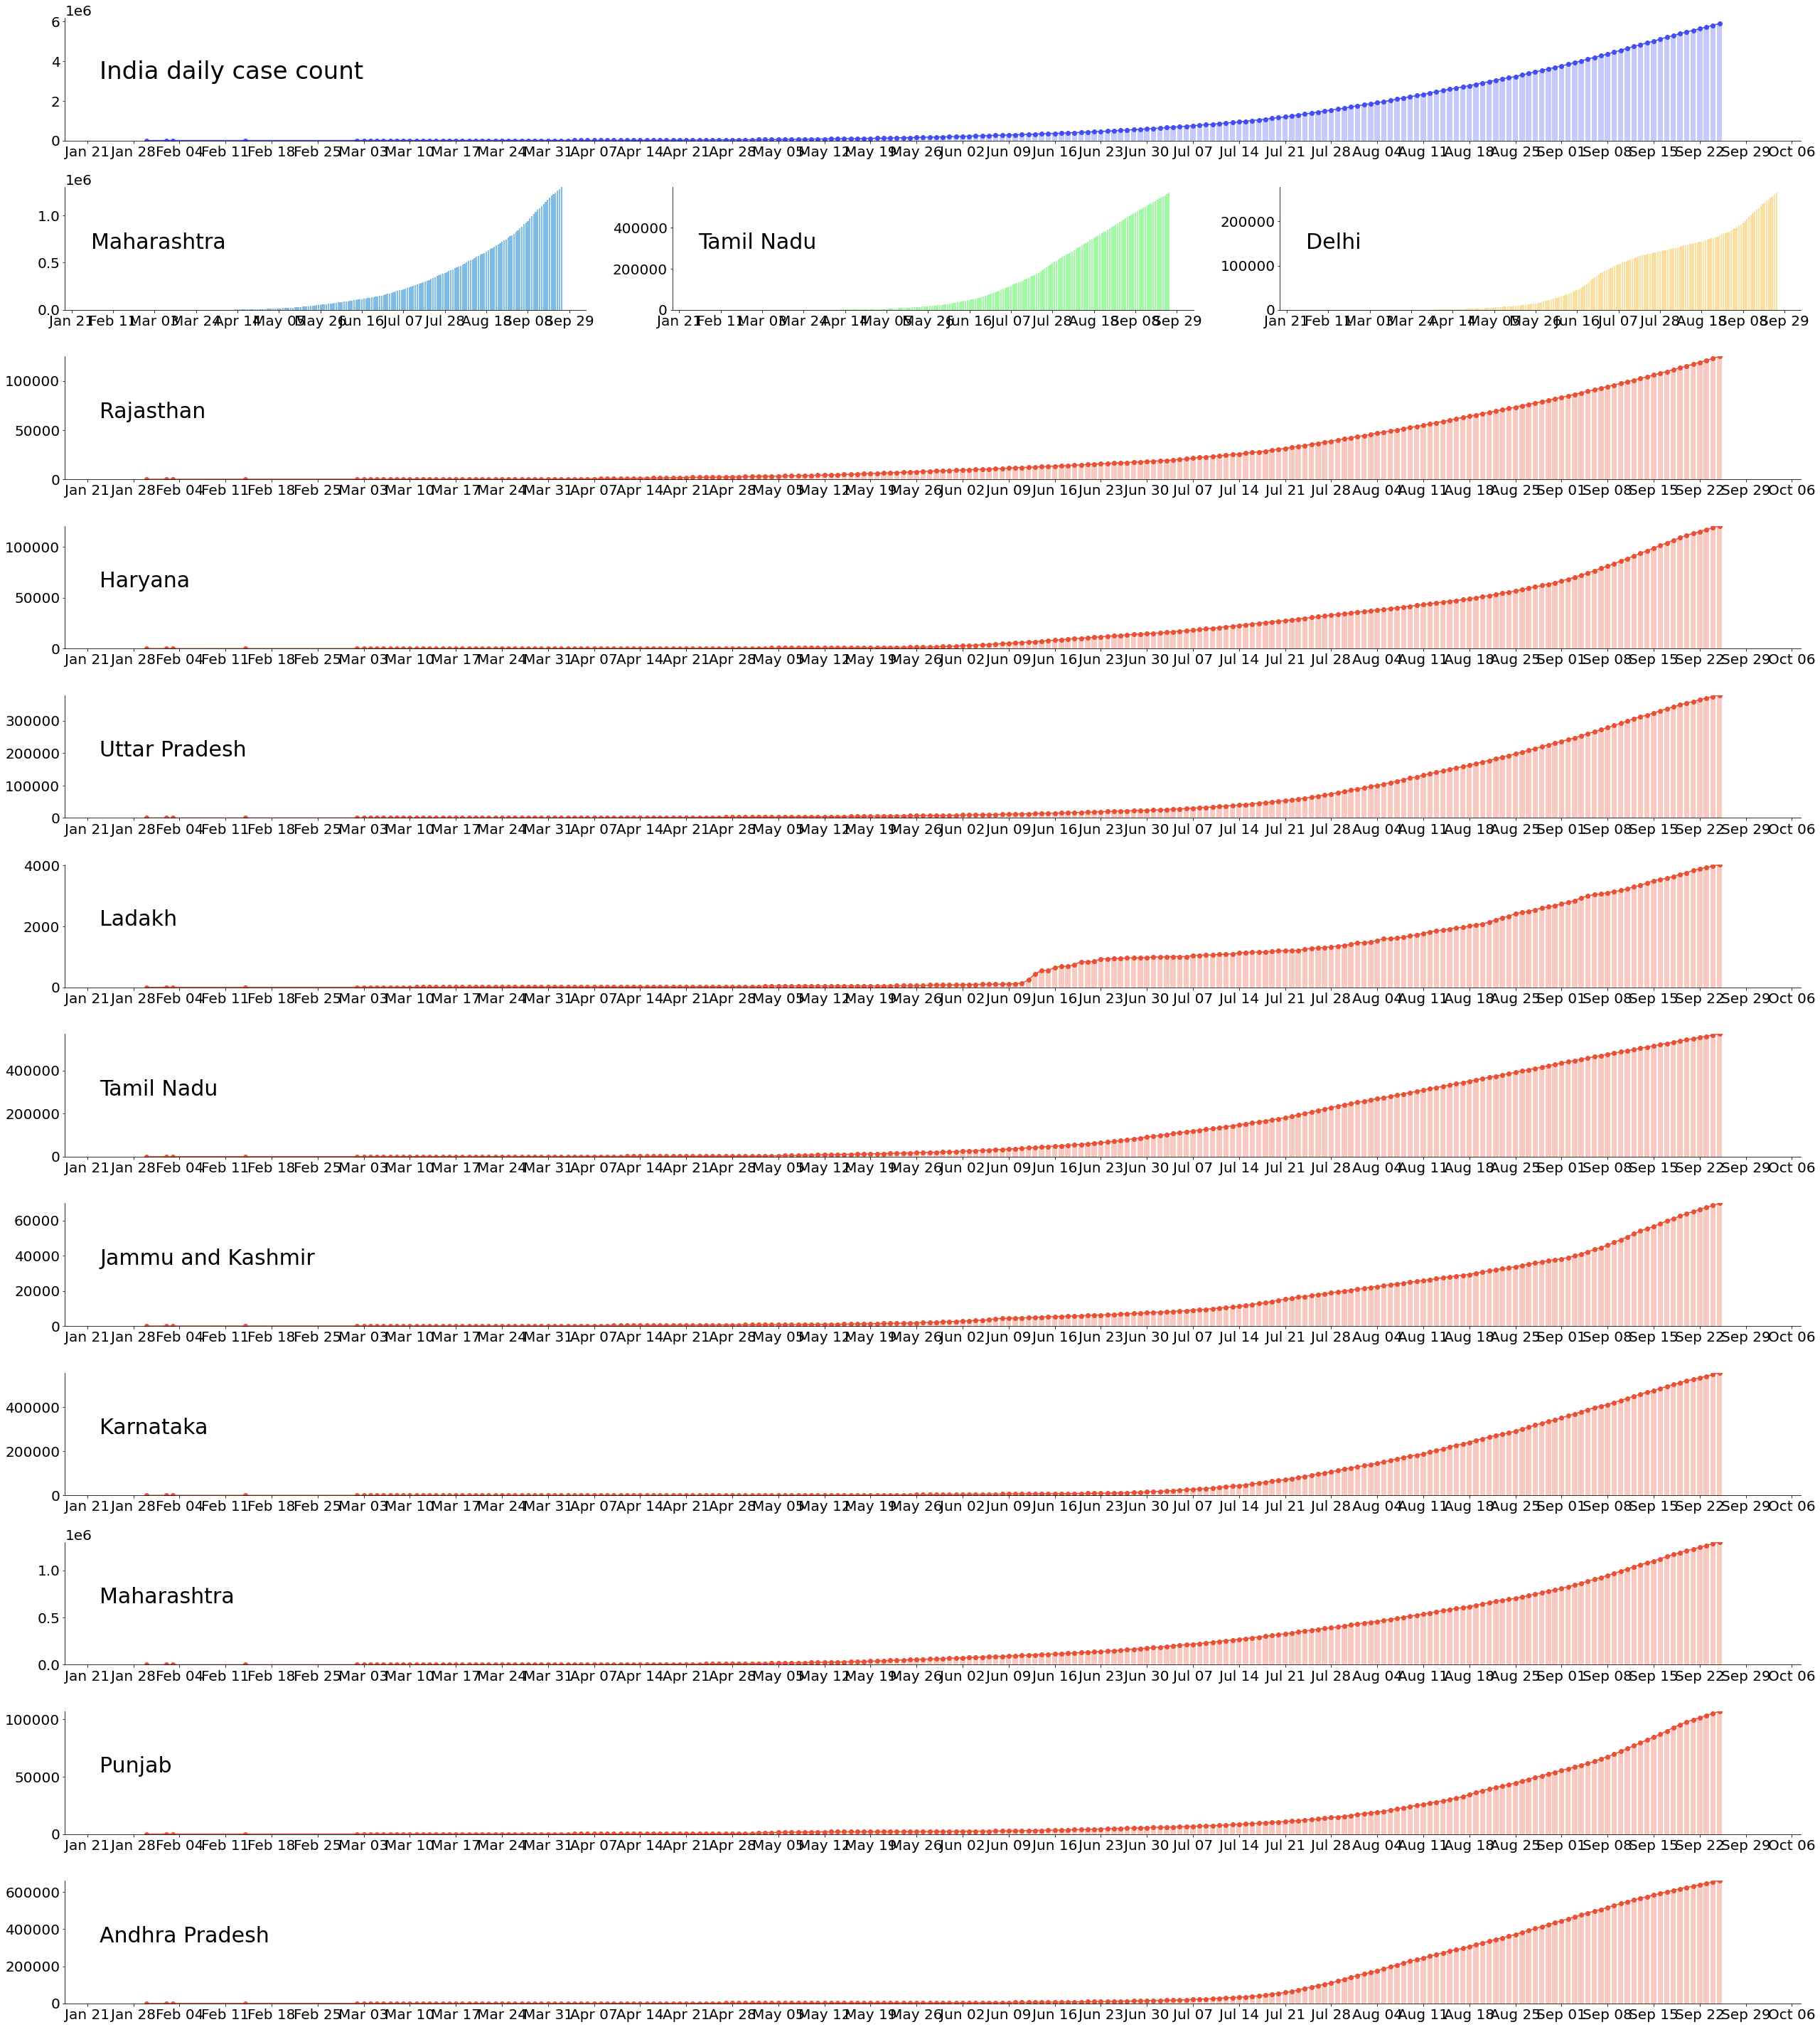

In [14]:
#hide_input
plt.rcParams.update({'font.size': 20})

#plotting graphs for the dashboard
df = revised_confirmed_df.copy()
df.loc['Total'] = df.sum()
n = 10
ax = []
fig = plt.figure(figsize = (36,40))
gs = fig.add_gridspec(n+2, 3)
# gs = fig.add_gridspec(2, 3)
ax1 = fig.add_subplot(gs[0, :])
ef = df.loc['Total'].rename_axis('date').reset_index()
ef = ef.iloc[:len(ef)-1, :]

ef['date'] = ef['date'].astype('datetime64[ns]')
ax1.bar(ef.date,ef.Total,alpha=0.3,color='#424ef5')
ax1.plot(ef.date,ef.Total , marker="o", color='#424ef5')
ax1.xaxis.set_major_locator(mdates.WeekdayLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax1.text(0.02, 0.5,'India daily case count', transform = ax1.transAxes, fontsize=34);
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax2 = fig.add_subplot(gs[1,0])
ef = df.loc['Maharashtra'].rename_axis('date').reset_index()
ef = ef.iloc[:len(ef)-1, :]
ef['date'] = ef['date'].astype('datetime64[ns]')

ax2.bar(ef.date, ef.Maharashtra,color = '#007acc',alpha=0.5)
ax2.xaxis.set_major_locator(mdates.WeekdayLocator())
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax2.set_xticks(ax2.get_xticks()[::3])
maxyval = ef.Maharashtra.max()
ax2.set_ylim([0,maxyval])
ax2.text(0.05, 0.5,'Maharashtra', transform = ax2.transAxes, fontsize=30);
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)

ax3 = fig.add_subplot(gs[1,1])
ef = df.loc['Tamil Nadu'].rename_axis('date').reset_index()
ef = ef.iloc[:len(ef)-1, :]
ef['date'] = ef['date'].astype('datetime64[ns]')
ax3.bar(ef.date, ef['Tamil Nadu'],color = '#42f548',alpha=0.5,)
ax3.xaxis.set_major_locator(mdates.WeekdayLocator())
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax3.set_xticks(ax3.get_xticks()[::3])
ax3.text(0.05, 0.5,'Tamil Nadu', transform = ax3.transAxes, fontsize=30);
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)

ax4 = fig.add_subplot(gs[1,2])
ef = df.loc['Delhi'].rename_axis('date').reset_index()
ef = ef.iloc[:len(ef)-1, :]
ef['date'] = ef['date'].astype('datetime64[ns]')
ax4.bar(ef.date, ef.Delhi,color = '#f5c242',alpha=0.5)
ax4.set_xticks([])
ax4.xaxis.set_major_locator(mdates.WeekdayLocator())
ax4.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
ax4.set_xticks(ax4.get_xticks()[::3])
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)

ax4.text(0.05, 0.5,'Delhi', transform = ax4.transAxes, fontsize=30)

for i in range(n):
    
    ax.append(fig.add_subplot(gs[i+2,:]))
    ef = df.iloc[i+3].rename_axis('date').reset_index()
    ef = ef.iloc[:len(ef)-1, :]
    ef['date'] = ef['date'].astype('datetime64[ns]')
    ax[i].bar(ef.date,ef.iloc[:,-1],alpha=0.3, color='#eb4f34')
    ax[i].plot(ef.date,ef.iloc[:,-1],marker='o', color = '#eb4f34')
    ax[i].text(0.02,0.5,f'{ef.columns.values[-1]}',transform = ax[i].transAxes, fontsize = 30);
    ax[i].xaxis.set_major_locator(mdates.WeekdayLocator())
    ax[i].xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
    ax[i].set_ylim([0,max(ef.iloc[:,-1])])
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
plt.tight_layout()


In [15]:
#hide_input
today_summary_table.style.background_gradient(cmap='Blues')

,State,Confirmed,Deceased,Recovered,PConfirmed,PDeceased,PRecovered,Fatality Rate
0,India,5901804,93410,4846327,5816106,92317,4753002,1.580000
1,Maharashtra,1300757,34761,992806,1282963,34345,973214,2.670000
2,Andhra Pradesh,661458,5606,588169,654385,5558,579474,0.850000
3,Tamil Nadu,569370,9148,513836,563691,9076,508210,1.610000
4,Karnataka,557212,8417,450302,548557,8331,444658,1.510000
5,Uttar Pradesh,378533,5450,313686,374277,5366,307611,1.440000
6,Delhi,264450,5147,228436,260623,5123,224375,1.950000
7,West Bengal,241059,4665,211020,237869,4606,208042,1.940000
8,Odisha,201096,820,165432,196888,805,161044,0.410000
9,Telangana,181627,1080,150160,179246,1070,148139,0.590000


In [16]:
#hide 
#creating heatmap with Altair

#import altair as alt

#url = "https://raw.githubusercontent.com/deldersveld/topojson/master/countries/india/india-states.json"

#india_source = alt.topo_feature(url, "IND_adm1")
#source = df_table

#alt.Chart(india_source).mark_geoshape().encode(
#    tooltip='properties.NAME_1:N'
#).properties(
#    width=600,
#    height=1000)